# I] Import functions and options

In [127]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})
from matplotlib_venn import venn2

In [128]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [129]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download

In [130]:
%%time
# DL data ATG7 isoform expression
path = output_file_directory + "ATG7/TCGA_GTEX/all_filtered_tissues/"
path2 = 'dataframes_for_input/'
df_ATG7_Normal = pandas.read_csv(path+path2+'df_ATG7_Normal_filtered.csv', sep = ",")
df_ATG7_Primary = pandas.read_csv(path+path2+'df_ATG7_Primary_filtered.csv', sep = ",")

#remove Survival information
dfs = df_ATG7_Normal, df_ATG7_Primary
for df in dfs:
    df.drop(df.columns[[3, 4]], axis = 1, inplace = True)

print(df_ATG7_Normal.shape)
df_ATG7_Normal.head(2)

(4453, 20)
Wall time: 67.8 ms


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-132AR-1726-SM-5EGHQ,Normal Tissue,Adrenal Gland,4.496,2.803,1.614,-0.2498,22.563767,6.977902,3.059994,0.840013,4.558498,2.996009,2.021477,10.877908,64.147459,28.130349,7.722192,0.309253,0.135615
1,GTEX-U4B1-0126-SM-4DXSN,Normal Tissue,Adrenal Gland,4.293,2.958,1.860,-0.0725,19.601965,7.769460,3.629077,0.949989,4.364710,3.132488,2.210724,12.348525,62.918120,29.388745,7.693134,0.396361,0.185138


In [131]:
%%time
# DL data ATG7 isoform expression Norm_Prim
path = output_file_directory + "ATG7/TCGA_GTEX/all_filtered_tissues/"
path2 = 'dataframes_for_input/'
df_ATG7_NormPrim = pandas.read_csv(path+path2+'df_ATG7_NormPrim_filtered.csv', sep = ",")

#remove Survival information
df_ATG7_NormPrim.drop(df_ATG7_NormPrim.columns[[3, 4]], axis = 1, inplace = True)

print(df_ATG7_NormPrim.shape)
df_ATG7_NormPrim.head(2)

(11334, 20)
Wall time: 58.8 ms


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-132AR-1726-SM-5EGHQ,Normal Tissue,Adrenal Gland,4.496,2.803,1.614,-0.2498,22.563767,6.977902,3.059994,0.840013,4.558498,2.996009,2.021477,10.877908,64.147459,28.130349,7.722192,0.309253,0.135615
1,GTEX-U4B1-0126-SM-4DXSN,Normal Tissue,Adrenal Gland,4.293,2.958,1.860,-0.0725,19.601965,7.769460,3.629077,0.949989,4.364710,3.132488,2.210724,12.348525,62.918120,29.388745,7.693134,0.396361,0.185138


# III] ATG7 expression

## A) ATG7 expression

In [132]:
#Verification of no values are negative
columns = 'log2_p1_ATG7_total', 'log2_p1_ATG7_1', 'log2_p1_ATG7_2'
for column in columns:
    print(df_ATG7_Normal[column].min())

0.0
0.0
0.0


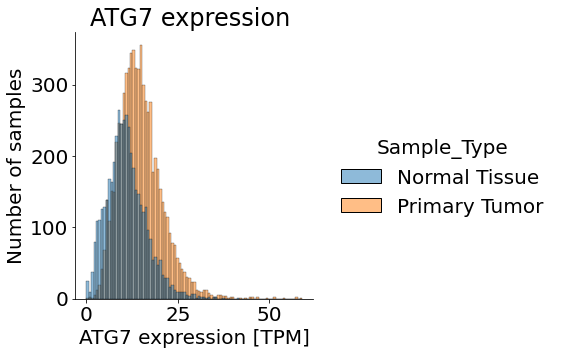

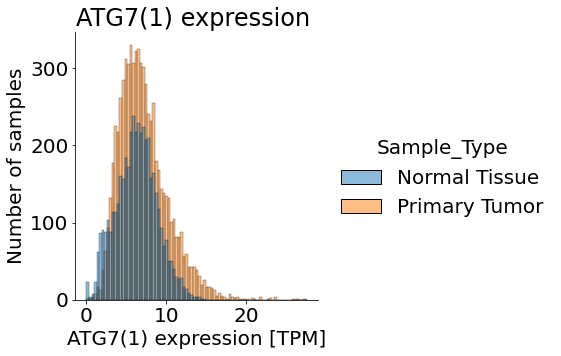

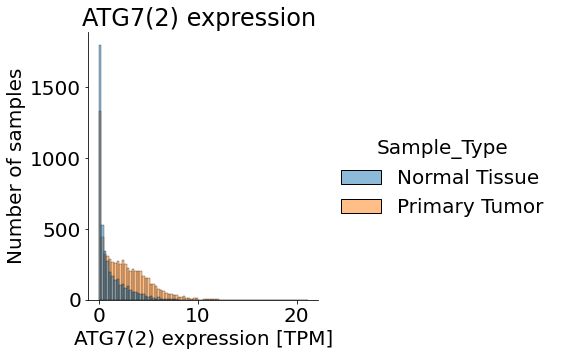

In [133]:
# Distribution graph, for ATG7, iso1 & iso2
## TPM + Count Scale
isoforms = 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm'
isoforms_info = 'ATG7', 'ATG7(1)', 'ATG7(2)'
df_ATG7_NormPrim
for i in range(len(isoforms)):
    isoform = isoforms[i]
    Data = df_ATG7_NormPrim[['Sample_Type', isoform]]

    seaborn.displot(Data, x= isoform, hue="Sample_Type")
    plt.ylabel('Number of samples')
    plt.xlabel(isoforms_info[i] + ' expression [TPM]')
    plt.title(isoforms_info[i]+ ' expression ')
    title_file = 'distrib_' + isoforms_info[i]

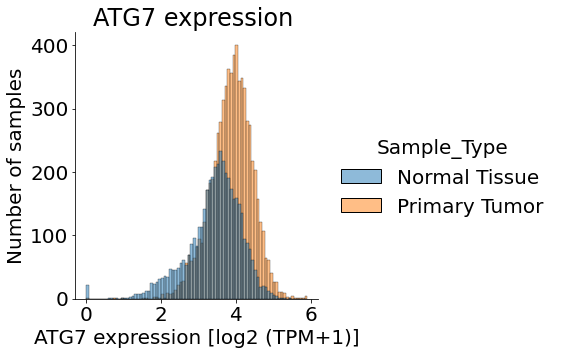

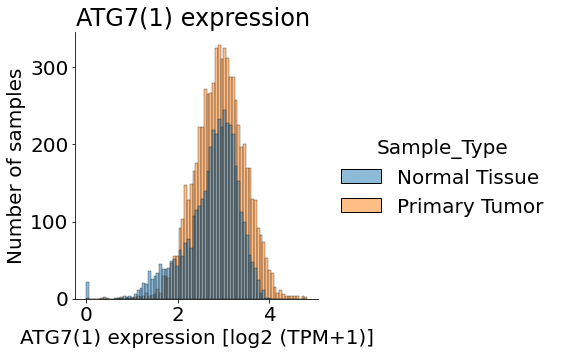

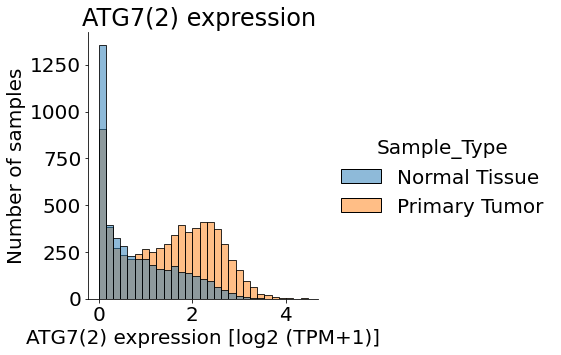

In [134]:
# Distribution graph, for ATG7, iso1 & iso2
## LOG2(TPM+1) + Count Scale
isoforms = 'log2_p1_ATG7_total', 'log2_p1_ATG7_1', 'log2_p1_ATG7_2'
isoforms_info = 'ATG7', 'ATG7(1)', 'ATG7(2)'
df_ATG7_NormPrim
for i in range(len(isoforms)):
    isoform = isoforms[i]
    Data = df_ATG7_NormPrim[['Sample_Type', isoform]]

    seaborn.displot(Data, x= isoform, hue="Sample_Type")
    plt.ylabel('Number of samples')
    plt.xlabel(isoforms_info[i] + ' expression [log2 (TPM+1)]')
    plt.title(isoforms_info[i]+ ' expression ')
    title_file = 'distrib_' + isoforms_info[i]

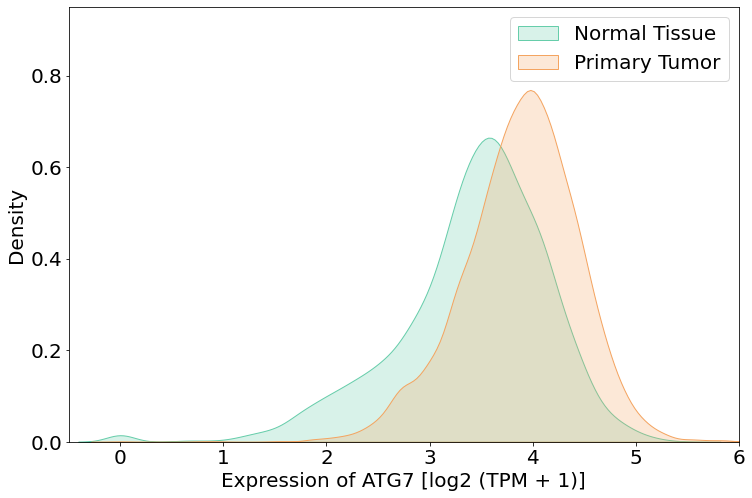

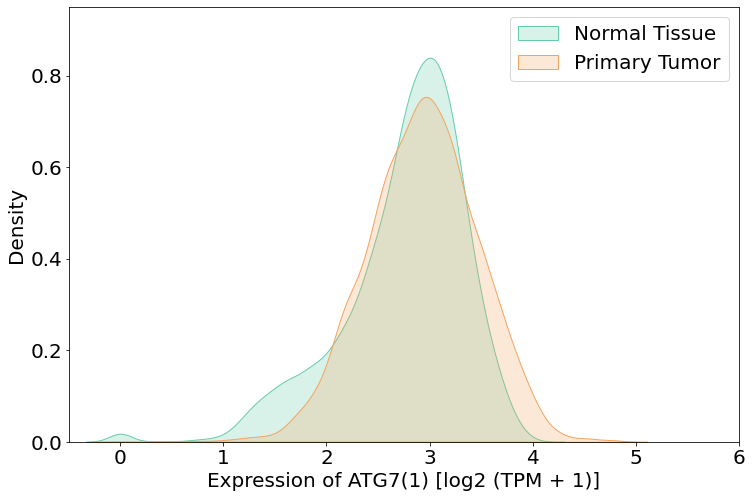

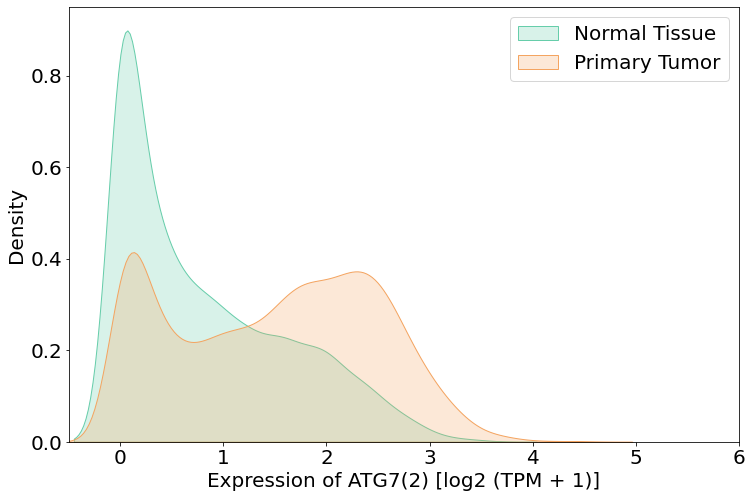

<Figure size 864x576 with 0 Axes>

In [135]:
# Distribution graph, for ATG7, iso1 & iso2
## LOG2(TPM+1) + Density
isoforms = 'log2_p1_ATG7_total', 'log2_p1_ATG7_1', 'log2_p1_ATG7_2'
isoforms_info = 'ATG7', 'ATG7(1)', 'ATG7(2)'

for i in range(len(isoforms)):
    isoform = isoforms[i]
    xData = df_ATG7_Normal[isoform]
    x2Data = df_ATG7_Primary[isoform]

    seaborn.kdeplot(xData, color = 'mediumaquamarine', fill = True)
    seaborn.kdeplot(x2Data, color = 'sandybrown', fill = True)

    plt.xlabel('Expression of '+ isoforms_info[i] + ' [log2 (TPM + 1)]')
    plt.xlim(-0.5, 6)
    plt.ylim(0, 0.95)
#     plt.title(isoforms_info[i]+ ' expression ')
    plt.legend(labels=["Normal Tissue","Primary Tumor"])
    title_file = 'distrib_' + isoforms_info[i]
    
    path2 = 'figs_ATG7_characterisation/'
    plt.savefig(path+path2+title_file+'.svg')
    plt.show()
    plt.clf()

## B) Percentage do not express ATG7 isoforms

In [136]:
#Percentage of patients: 
all_dfs = [[df_ATG7_Normal, 'all normal tissue'], [df_ATG7_Primary, 'all primary tumor']]

isoforms = [['ATG7_total', 'ATG7'], ['ATG7_1tpm', 'ATG7(1)'], 
            ['ATG7_2tpm', 'ATG7(2)'], ['ATG7_3tpm', 'ATG7(3)']]

for df in all_dfs:
  print(df[1].upper())
  for isoform in isoforms:
        
    what = isoform[1]
    all_ = (df[0][isoform[0]]).shape
    no_exp = (df[0][isoform[0]]<0.1).sum()
    perc_no_exp = (no_exp*100)/all_
    perc_no_exp = float(perc_no_exp)

    # print("The percentage of patient who do not express", QUOI, OU, "is:", round(perc_no_exp,1),'%')
    print(round(perc_no_exp,1),'% of tumor do not express', what)
  print()


ALL NORMAL TISSUE
0.5 % of tumor do not express ATG7
0.5 % of tumor do not express ATG7(1)
29.3 % of tumor do not express ATG7(2)
63.8 % of tumor do not express ATG7(3)

ALL PRIMARY TUMOR
0.0 % of tumor do not express ATG7
0.0 % of tumor do not express ATG7(1)
12.7 % of tumor do not express ATG7(2)
33.2 % of tumor do not express ATG7(3)



In [137]:
#Percentage of patients: 
all_dfs = [[df_ATG7_Normal, 'Normal Tissue'], [df_ATG7_Primary, 'Primary Tumor']]

isoforms = [['ATG7_total', 'ATG7'], ['ATG7_1tpm', 'ATG7(1)'], 
            ['ATG7_2tpm', 'ATG7(2)']]

df_number_exp = []
what = []
sample_type = []
who_dontexp = []
perc_noexp = []
    
for df in all_dfs:
    for isoform in isoforms:
        #save what isoform
        what.append(isoform[1])
        #save sample_type
        sample_type.append(df[1])
        #have total sample number
        all_ = (df[0][isoform[0]]).shape
        #calculate number of sample who express the isoform
        without_exp = (df[0][isoform[0]]<0.1).sum()
        who_dontexp.append(without_exp)
        #convert result to percentage
        perc_without_exp = float((without_exp*100)/all_)   
        perc_noexp.append(round(perc_without_exp,1))

        #create a dictionnary and convert to dataframe
        d = dict(Isoforms = what, who_dontexp = who_dontexp, 
                 Percentage = perc_noexp, Sample_Type = sample_type)
        df_noexpr_distrib = pandas.DataFrame.from_dict(d, orient='index')
        df_noexpr_distrib = df_noexpr_distrib.T
          
df_noexpr_distrib


,Isoforms,who_dontexp,Percentage,Sample_Type
0,ATG7,22,0.5,Normal Tissue
1,ATG7(1),22,0.5,Normal Tissue
2,ATG7(2),1304,29.3,Normal Tissue
3,ATG7,1,0,Primary Tumor
4,ATG7(1),1,0,Primary Tumor
5,ATG7(2),873,12.7,Primary Tumor


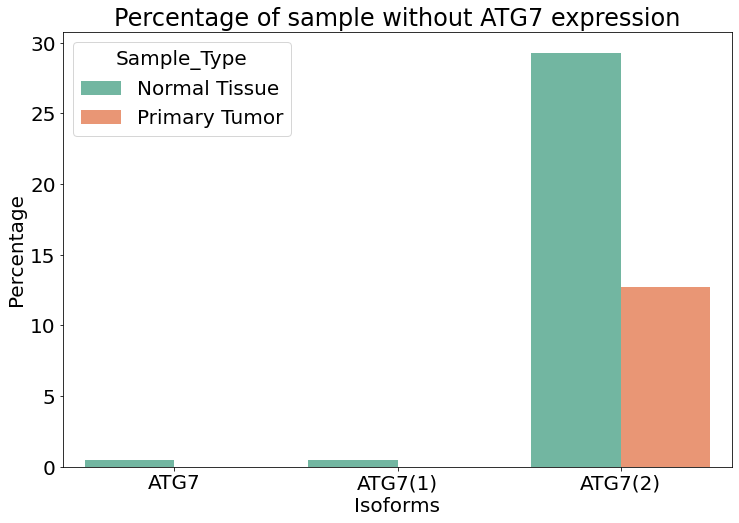

In [138]:
seaborn.barplot(data=df_noexpr_distrib, x="Isoforms", y="Percentage", hue="Sample_Type", 
                palette = 'Set2', orient = 'v')
plt.title("Percentage of sample without ATG7 expression")
plt.yticks(fontsize=20)


plt.savefig(path+path2+'percentage_expression.svg')

## C) Expression figures

### 1) Value TPM

11334


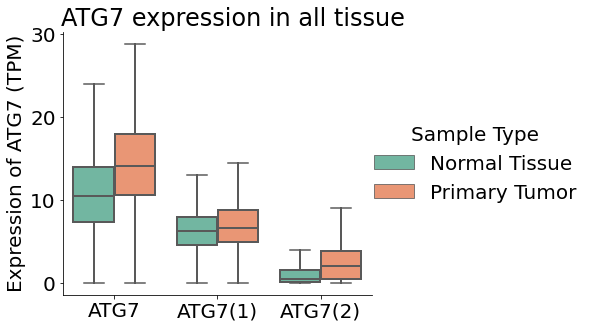

In [139]:
# Distribution: Data preparation + graph
Data = df_ATG7_NormPrim
info = 'all tissue'

shape = Data.shape
shape = shape[0]
print(shape)

#select the sample type column
sample_type = {'sample_type':[Data.iloc[:,1][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
sample_typedf = pandas.DataFrame(sample_type)
sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
sample_typedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(7,10)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for ATG7/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'ATG7'
data_distrib.loc[shape: shape*2,'x'] = 'ATG7(1)'
data_distrib.loc[shape*2:,'x'] = 'ATG7(2)'

# Will be used for Hue
data_distrib['Sample Type'] = sample_typedf['sample_type']

#graph
seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('Expression of ATG7 (TPM)')
plt.xlabel('')
plt.title('ATG7 expression in '+ info, x=.55)

#save

plt.savefig(path+path2+'ATG7_exp_alltissue.svg')

In [94]:
#Distribution: Stats for all 

all_dfs = [[df_ATG7_Normal, 'all normal tissue', df_ATG7_Primary, 'all primary tumors']]

isoforms = ['ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm']

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


the pvalue between all normal tissue(10.460) and all primary tumors(14.073) for ATG7_total is 4.894E-252
the pvalue between all normal tissue(6.271) and all primary tumors(6.670) for ATG7_1tpm is 3.712E-33
the pvalue between all normal tissue(0.460) and all primary tumors(2.010) for ATG7_2tpm is 5.541E-295



In [140]:
#Verification everything is correct
#median from brut file:
print('brut file:')
isoforms = 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm'
for isoform in isoforms:
    print(df_ATG7_NormPrim[isoform].median())

#median after modification:
isoforms = 'ATG7', 'ATG7(1)', 'ATG7(2)' 
print('------------\nafter modification:')                     
for isoform in isoforms:
    print(data_distrib[data_distrib['x'] == isoform].median())

brut file:
12.622149453639445
6.519578659221003
1.19002194862203
------------
after modification:
y    12.622149
dtype: float64
y    6.519579
dtype: float64
y    1.190022
dtype: float64


### 2) Normalized

11334


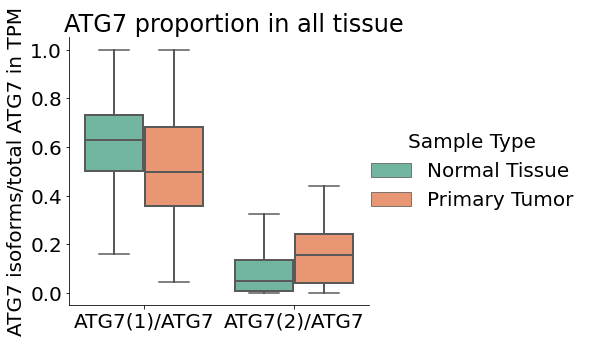

In [143]:
# NORMALiZED Distribution: Data preparation + graph
# Distribution: Data preparation + graph
Data = df_ATG7_NormPrim
info = 'all tissue'

shape = Data.shape
shape = shape[0]
print(shape)

#select the sample type column
sample_type = {'sample_type':[Data.iloc[:,1][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
sample_typedf = pandas.DataFrame(sample_type)
sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
sample_typedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(18,20)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for ATG7/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'ATG7(1)/ATG7'
data_distrib.loc[shape:,'x'] = 'ATG7(2)/ATG7'

# Will be used for Hue
data_distrib['Sample Type'] = sample_typedf['sample_type']

#graph
seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('ATG7 isoforms/total ATG7 in TPM')
plt.xlabel('')
plt.title('ATG7 proportion in '+ info, x=0.55)

#save graph
plt.savefig(path+path2+'prop_alltissue.svg')



In [146]:
#NORMALIZED Distribution: Stats for all 
isoforms = 'ATG7_1norm', 'ATG7_2norm'
print('NORMALIZED')

for isoform in isoforms:
    n1 = "{:.3f}".format(df_ATG7_Normal[isoform].median())
    n2 = "{:.3f}".format(df_ATG7_Primary[isoform].median())
    
    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ATG7_Normal[isoform], df_ATG7_Primary[isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", 'all normal tissue'+'('+n1+')', "and", 
          "all primary tumors"+'('+n2+')', "for", isoform, 'is', Pvalue)

NORMALIZED
the pvalue between all normal tissue(0.629) and all primary tumors(0.495) for ATG7_1norm is 1.028E-145
the pvalue between all normal tissue(0.049) and all primary tumors(0.154) for ATG7_2norm is 2.045E-241


## D) Correlation between the two isoforms

In [149]:
#Remove the 0.5% extremities to have a nicer graph
dfs = df_ATG7_Normal, df_ATG7_Primary
infos = "Normal tissue", "Primary tumor"
isoforms = 'ATG7_1', 'ATG7_2'
df_final = []

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    isoform = isoforms[i]

    #Remove 0.5% extremities
    df_no_extrem = []
    for isoform in isoforms:
        print(info, ':', df.shape)
        #sort by value, 
        for_isoforms = df.sort_values([isoform], ascending = False)
        print(isoform)
        
        #remove the extremities
        lenght = len(for_isoforms)
        without_05perc = int(lenght*0.005)
        print('', without_05perc, 'are removed from head and tail')
        without_head = without_05perc
        without_tail = lenght - without_05perc
                
        df_no_extremities = for_isoforms.iloc[without_head:without_tail,:]
        print(' without extremities:', df_no_extremities.shape)
        print()
        df_no_extrem.append(df_no_extremities)
        
    #drop the unfiltered column ATG7_2 ([0]) and replace it with the filtered one ([1]) 
    df_no_extrem[0].pop("ATG7_2")
    #add column ATG7_2 (filtered one) at the correct position
    df_no_extrem[0].insert(5, "ATG7_2", df_no_extrem[1]['ATG7_2'])
    #remove NaN (the deleted samples for the two isoform)
    df = df_no_extrem[0].dropna(axis=0)
    df_final.append(df)
    print('df_final after merge of the two filtered columns:', df.shape)
    print('________________________')
    #now, need to compute the two isoform with sample name.

Normal tissue : (4453, 20)
ATG7_1
 22 are removed from head and tail
 without extremities: (4409, 20)

Normal tissue : (4453, 20)
ATG7_2
 22 are removed from head and tail
 without extremities: (4409, 20)

df_final after merge of the two filtered columns: (4365, 20)
________________________
Primary tumor : (6881, 20)
ATG7_1
 34 are removed from head and tail
 without extremities: (6813, 20)

Primary tumor : (6881, 20)
ATG7_2
 34 are removed from head and tail
 without extremities: (6813, 20)

df_final after merge of the two filtered columns: (6746, 20)
________________________


The correlation between iso1 and iso2 in Normal tissue is: 0.15512544706419704 6.458574496152229e-25


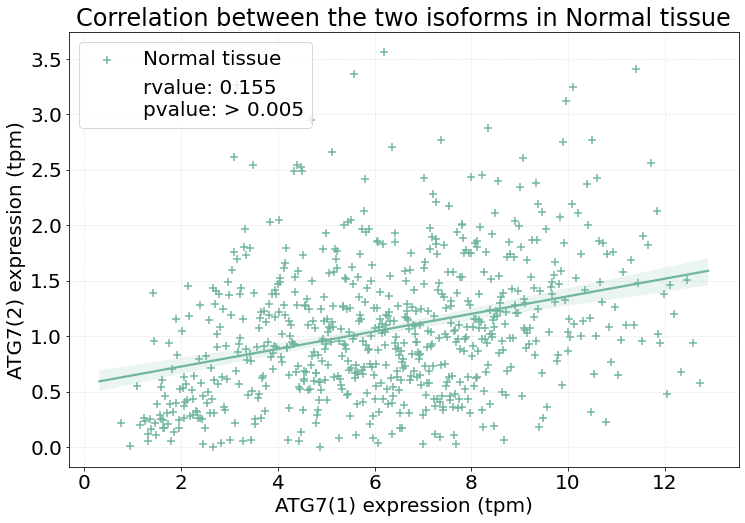


The correlation between iso1 and iso2 in Primary tumor is: -0.1866884675629981 5.81270691569753e-54


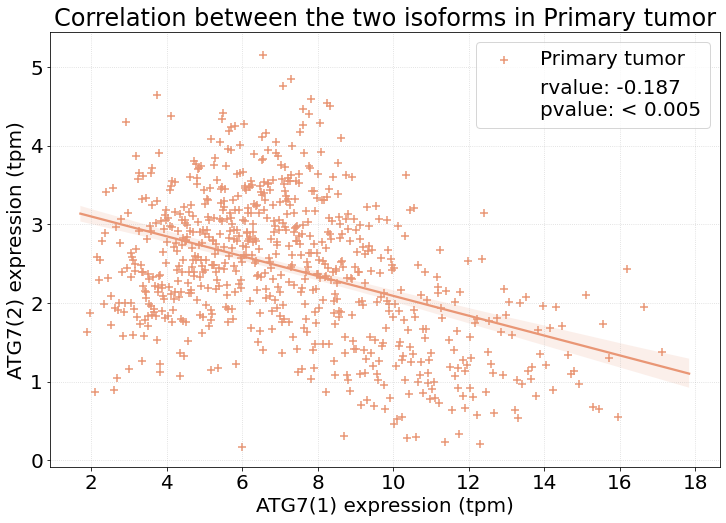

<Figure size 864x576 with 0 Axes>

In [156]:
#Graph and stats_ spearman correlation
#graph
color1 = '#72B6A1'
color2 = '#e99675'

dfs = df_final[0], df_final[1] 
infos = "Normal tissue", "Primary tumor"
p_texts = '> 0.005', '< 0.005'
colors = color1, color2

for i in range(len(dfs)):  
    df = dfs[i]
    info = infos[i]
    p_text = p_texts[i]
    color = colors[i]
    
    x = df['ATG7_1tpm'].to_list()
    y = df['ATG7_2tpm'].to_list()    
    
    #stat Spearman correlation 
    r_value, p_value = scipy.stats.spearmanr(x, y)
    print("The correlation between iso1 and iso2 in", info, "is:", r_value, p_value)
    
    #graph
    seaborn.regplot(x=x,y=y, x_bins=800, x_ci = 0, marker="+", label = info, color = color)
    seaborn.regplot(x=[],y=[], marker=" ", label= 'rvalue: '+str(round(r_value,3))+ "\npvalue: "+str(p_text))

    name = "Correlation between the two isoforms in " + info
    plt.title(name)
    plt.xlabel("ATG7(1) expression (tpm)")
    plt.ylabel('ATG7(2) expression (tpm)')

    plt.grid(ls = ":", alpha=0.5)
    plt.legend()

    #save
    title_file = 'ATG7s_corr_tpm_' + info
    plt.savefig(path+path2+title_file+'.svg')

    plt.show()  
    plt.clf()
    print()